In [21]:
from rdkit import Chem
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.Crippen as Crippen
import pandas as pd
import numpy as np
import MDAnalysis as mda

In [22]:
mol = Chem.rdmolfiles.MolFromMol2File("../dataset/refined-set/1a1e/1a1e_ligand.mol2")

In [23]:
#Hydrogen bond donors and acceptors in ligand https://www.rdkit.org/docs/source/rdkit.Chem.Lipinski.html
L_A = Lipinski.NumHAcceptors(mol)
L_D = Lipinski.NumHDonors(mol)

In [24]:
print(L_A)
print(L_D)

9
2


In [25]:
#Octanol-water logP https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html
LogP = Crippen.MolLogP(mol) 

In [26]:
print(LogP)

0.4552000000000014


In [27]:
#Molar Refractivity https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html
MR = Crippen.MolMR(mol)

In [18]:
print(MR)

131.67240000000004


In [28]:
#Wiener index http://www.scfbio-iitd.res.in/software/drugdesign/WINDEX/wienerindex.htm
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    for i in range(m.GetNumAtoms()):
        for j in range(i+1,m.GetNumAtoms()):
            res += amat[i][j]
    return res

In [29]:
#Wiener index for the ligand
wmol = wiener_index(mol)
print(wmol)


5169.0


In [30]:
#Molecular weight of the ligand https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
MW = Chem.rdMolDescriptors.CalcExactMolWt(mol)
MW

552.2116399099099

In [31]:
#Calculate for all the ligands
indices = pd.read_csv("../dataset/index_clean", delimiter=',',header=None, comment='#')

In [32]:
indices[0].values

array(['2tpi', '4tln', '1rnt', ..., '6k04', '6ic2', '6gxe'], dtype=object)

In [33]:
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    for i in range(m.GetNumAtoms()):
        for j in range(i+1,m.GetNumAtoms()):
            res += amat[i][j]
    return res

In [ ]:
arr = np.zeros((len(indices[0]), 6))
for j,i in enumerate(indices[0]):
    #load sdf file
    #ignore errors
    try:
        mol = Chem.rdmolfiles.SDMolSupplier(f"../dataset/refined-set/{i}/{i}_ligand.sdf")[0]
        MWe = Chem.rdMolDescriptors.CalcExactMolWt(mol)
        L_A = Lipinski.NumHAcceptors(mol)
        L_D = Lipinski.NumHDonors(mol)
        LogP = Crippen.MolLogP(mol) 
        MR = Crippen.MolMR(mol)
        wmol = wiener_index(mol)

    except:
        mol = Chem.rdmolfiles.MolFromMol2File(f"../dataset/refined-set/{i}/{i}_ligand.mol2")  
        print("mol2")      
        MWe = Chem.rdMolDescriptors.CalcExactMolWt(mol)
        L_A = Lipinski.NumHAcceptors(mol)
        L_D = Lipinski.NumHDonors(mol)
        LogP = Crippen.MolLogP(mol) 
        MR = Crippen.MolMR(mol)
        wmol = wiener_index(mol)
    arr[j] = [MWe, L_A, L_D, LogP, MR, wmol]
  
    

In [14]:
arr

array([[ 2.31170319e+02,  2.00000000e+00,  3.00000000e+00,
        -1.31600000e-01,  6.05356000e+01,  4.61000000e+02],
       [ 1.47112804e+02,  2.00000000e+00,  3.00000000e+00,
        -8.51600000e-01,  3.60603000e+01,  1.30000000e+02],
       [ 3.63057999e+02,  1.00000000e+01,  6.00000000e+00,
        -2.56970000e+00,  7.64808000e+01,  1.23000000e+03],
       ...,
       [ 4.04151622e+02,  6.00000000e+00,  1.00000000e+00,
         4.72902000e+00,  1.14434700e+02,  2.13400000e+03],
       [ 4.36991713e+02,  8.00000000e+00,  5.00000000e+00,
         4.24100000e-01,  8.99438000e+01,  1.70100000e+03],
       [ 3.07062677e+02,  4.00000000e+00,  4.00000000e+00,
         1.68360000e+00,  7.85634000e+01,  1.08800000e+03]])

In [15]:
indices.shape

(5316, 3)

In [16]:
df = pd.DataFrame(arr, columns=['Molecular weight', 'Acceptors', 'Donors', 'LogP', 'Molecular Refractivity', 'Wiener index'])

In [17]:
df['Ids'] = indices[0]

In [18]:
df['Molecular weight'].value_counts()

Molecular weight
427.029415    36
547.235222    23
506.995745    20
441.008679    20
385.128865    17
              ..
269.124431     1
504.159139     1
135.079647     1
155.021858     1
307.062677     1
Name: count, Length: 3878, dtype: int64

In [19]:
df

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn
...,...,...,...,...,...,...,...
5311,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i
5312,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0
5313,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04
5314,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2


In [35]:
import MDAnalysis as mda

In [42]:
protein = mda.Universe(f"../dataset/refined-set/1a1e/1a1e_protein.pdb")

In [43]:
ligand = mda.Universe(f"../dataset/refined-set/1a1e/1a1e_ligand.mol2")

In [48]:
ligand.atoms[0]

<Atom 1: C of type C.2 of resname ACE, resid 1 and segid SYSTEM>

In [44]:
complex = mda.Merge(protein.atoms, ligand.atoms)

In [55]:
ligname = ligand.residues[0].resname

In [56]:
pocket = complex.select_atoms(f"protein and around 6 resname {ligname}")

In [ ]:
#Hydrogen bond donors an acceptors in protein https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/charge/#:~:text=3%20amino%20acids%20(arginine%2C%20lysine,atoms%20in%20their%20side%20chain

In [58]:
#Select the hydrogen bond donors of arginine:

ARG_hbond = pocket.select_atoms("name NH1 NH2 NE")

In [62]:
#Select the hydrongen bond donors of the aminoacid groups as in the paper:

PD_amide = len(pocket.select_atoms("name N"))


15

In [67]:
#donors
PD_positive = len(pocket.select_atoms("name NZ NE NH1 NH2 ND1 NE2"))        #Lysine, arginine and histidine
PD_neutral = len(pocket.select_atoms("name ND2 NE2"))     #asparagine,glutamine
PD_heteroatom = len(pocket.select_atoms("name NE1"))    #Tryptophan
PD_OH = len(pocket.select_atoms("name OG OG1 OH"))    #Serine, Threonine, Tyrosine

In [69]:
#acceptors
PA_amide = len(pocket.select_atoms("name O"))
PA_negative = len(pocket.select_atoms("name OD1 OD2 OE1 OE2"))   #Aspartate, Glutamate
PA_neutral = len(pocket.select_atoms("name OE1 OG2 OH OD1"))       #Asparagine, Glutamine, tyrosine, serine
PA_aromatic = len(pocket.select_atoms("name OH ND1 NE2"))   #Tyrosine, Histidine

In [ ]:
arr = np.zeros((len(indices[0]), 9))
for j,i in enumerate(indices[0]):
    protein = mda.Universe(f"../dataset/refined-set/{i}/{i}_protein.pdb")
    ligand = mda.Universe(f"../dataset/refined-set/{i}/{i}_ligand.mol2")
    complex = mda.Merge(protein.atoms, ligand.atoms)
    ligname = ligand.residues[0].resname
    pocket = complex.select_atoms(f"protein and around 6 resname {ligname}")
    PD_amide = len(pocket.select_atoms("name N"))
    PD_positive = len(pocket.select_atoms("name NZ NE NH1 NH2 ND1 NE2"))        #Lysine, arginine and histidine
    PD_neutral = len(pocket.select_atoms("name ND2 NE2"))     #asparagine,glutamine
    PD_heteroatom = len(pocket.select_atoms("name NE1"))    #Tryptophan
    PD_OH = len(pocket.select_atoms("name OG OG1 OH"))    #Serine, Threonine, Tyrosine
    PA_amide = len(pocket.select_atoms("name O"))
    PA_negative = len(pocket.select_atoms("name OD1 OD2 OE1 OE2"))   #Aspartate, Glutamate
    PA_neutral = len(pocket.select_atoms("name OE1 OG2 OH OD1"))       #Asparagine, Glutamine, tyrosine, serine
    PA_aromatic = len(pocket.select_atoms("name OH ND1 NE2"))   #Tyrosine, Histidine
    P_logp = []
    P_MR = []
    arr[j] = [PD_amide, PD_positive, PD_neutral, PD_heteroatom, PD_OH, PA_amide, PA_negative, PA_neutral, PA_aromatic]
    


In [71]:
#Construct a table with the logP and MR of every amino acid
amino_acid_names = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'] # resname 3letter

#List of amino acid SMILES
SMILES_ASP = "C([C@@H](C(=O)O)N)C(=O)O" #aspartate #https://pubchem.ncbi.nlm.nih.gov/compound/Aspartic-Acid
aspartic_mol = Chem.MolFromSmiles(SMILES_ASP) #Mol object from SMILES

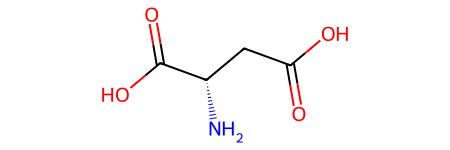

In [72]:
aspartic_mol # You can use this object to calculate the logP and MR of the amino acid

In [74]:
#Look up the smiles for every amino acid and calculate the logP and MR  and make a dictionary
#Example
log_P_dict = {}
MR_dict = {}
logP_aa = Crippen.MolLogP(aspartic_mol)

log_P_dict['ASP'] = logP_aa

log_P_dict

{'ASP': -1.1269999999999998}

In [ ]:
#Make a dictionary of the amino acids with their smiles
smiles_dict = {
    "ASP": "C([C@@H](C(=O)O)N)C(=O)O",
    "GLU": "placeholder",
    "LYS": "placeholder",
    "ARG": "placeholder",
    "HIS": "placeholder",
    "SER": "placeholder",
    "THR": "placeholder",
    "ASN": "placeholder",
    "GLN": "placeholder",
    "CYS": "placeholder",
    "MET": "placeholder",
    "TYR": "placeholder",
    "TRP": "placeholder",
    "PHE": "placeholder",
    "GLY": "placeholder",
    "PRO": "placeholder",
    "ALA": "placeholder",
    "VAL": "placeholder",
    "LEU": "placeholder",
    "ILE": "placeholder"
}

In [ ]:
#Iterate over your dictionary https://www.geeksforgeeks.org/iterate-over-a-dictionary-in-python/ and calculate the logP and MR of every amino acid and store it in a dictionary